In [6]:
!pip install --upgrade kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=e7dad6113826a605ea2cc8efb8d71b1b50c9967c179a1e1cbbe387c166e8d029
  Stored in directory: /root/.cache/pip/wheels/9f/af/22/bf406f913dc7506a485e60dce8143741abd0a92a19337d83a3
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"mahmoudabada","key":"76bdac4a0f7003e4aa8fa96512851a92"}'}

In [8]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
! kaggle datasets list

ref                                                          title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
bhadramohit/customer-shopping-latest-trends-dataset          Customer Shopping (Latest Trends) Dataset      76KB  2024-11-23 15:26:12          17480        348  1.0              
hopesb/student-depression-dataset                            Student Depression Dataset.                   454KB  2024-11-22 17:56:03          14098        193  1.0              
bushraqurban/tourism-and-economic-impact                     ✈️ Tourism and Economic Impact Dataset💰       270KB  2024-12-22 08:47:37           1020         29  1.0              
vedaantsingh/comprehensive-cryptocurrency-market-data        Comprehensive Cryptocurrency Market Data 🚀🌕 

In [19]:
!kaggle competitions download -c smart-urban-analytics

smart-urban-analytics.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
!ls

'kaggle (1).json'   kaggle.json   sample_data   smart-urban-analytics.zip


In [20]:
! unzip smart-urban-analytics.zip -d ./data

Archive:  smart-urban-analytics.zip
  inflating: ./data/urban_development_dataset.csv  
  inflating: ./data/urban_development_test_data.csv  


# Import Libraries and Load Data

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load datasets
train = pd.read_csv('data/urban_development_dataset.csv')
test = pd.read_csv('data/urban_development_test_data.csv')

# Print dataset shapes
print(f"Train Dataset Shape: {train.shape}")
print(f"Test Dataset Shape: {test.shape}")


Train Dataset Shape: (10000, 22)
Test Dataset Shape: (5000, 20)


# Dataset Overview and Basic Information

In [28]:
# Display dataset information
print("\n--- Train Dataset Info ---")
train.info()

print("\n--- Test Dataset Info ---")
test.info()

# Display a preview of the datasets
print("\n--- Train Dataset Sample ---")
print(train.head())

print("\n--- Test Dataset Sample ---")
print(test.head())


--- Train Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   population_density             9500 non-null   float64
 1   median_age                     9500 non-null   float64
 2   average_household_income       9500 non-null   float64
 3   number_of_schools              9500 non-null   float64
 4   number_of_hospitals            9500 non-null   float64
 5   number_of_parks                9500 non-null   float64
 6   public_transport_availability  9500 non-null   float64
 7   unemployment_rate              9500 non-null   float64
 8   retail_density                 9500 non-null   float64
 9   office_space_availability      9500 non-null   float64
 10  green_space_percentage         9500 non-null   float64
 11  average_temperature            9500 non-null   float64
 12  air_quality_index  

# Missing Value Analysis


--- Missing Values in Train ---
population_density               500
median_age                       500
average_household_income         500
number_of_schools                500
number_of_hospitals              500
number_of_parks                  500
public_transport_availability    500
unemployment_rate                500
retail_density                   500
office_space_availability        500
green_space_percentage           500
average_temperature              500
air_quality_index                500
crime_rate_per_1000              500
fire_station_proximity           500
proximity_to_highways            500
internet_speed                   500
housing_price_index              500
year                             500
road_density                     500
dtype: int64

--- Missing Values in Test ---
population_density               250
median_age                       250
average_household_income         250
number_of_schools                250
number_of_hospitals              2

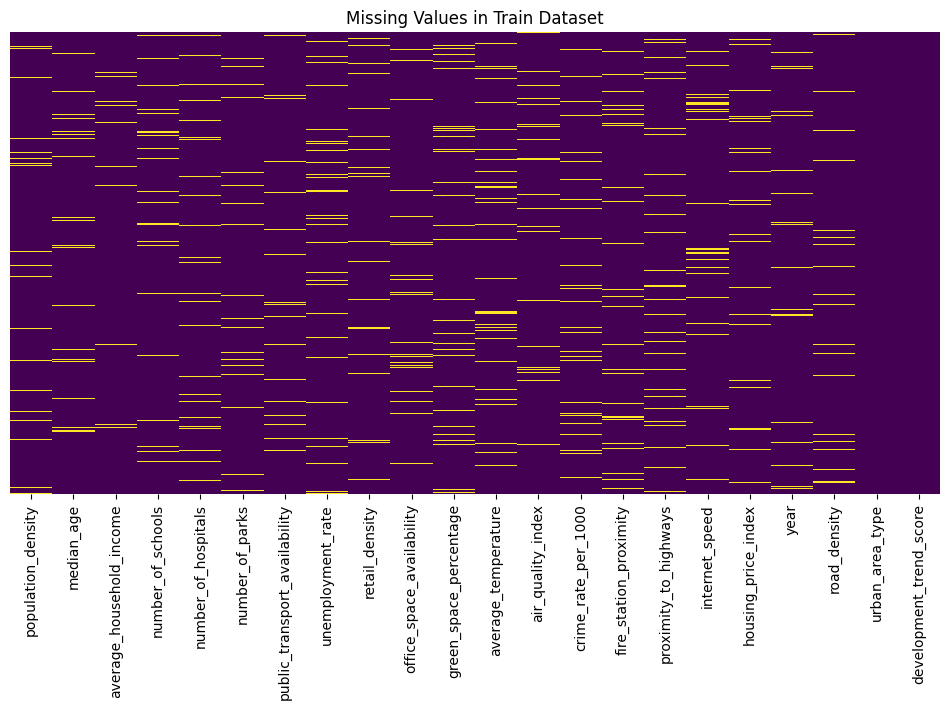

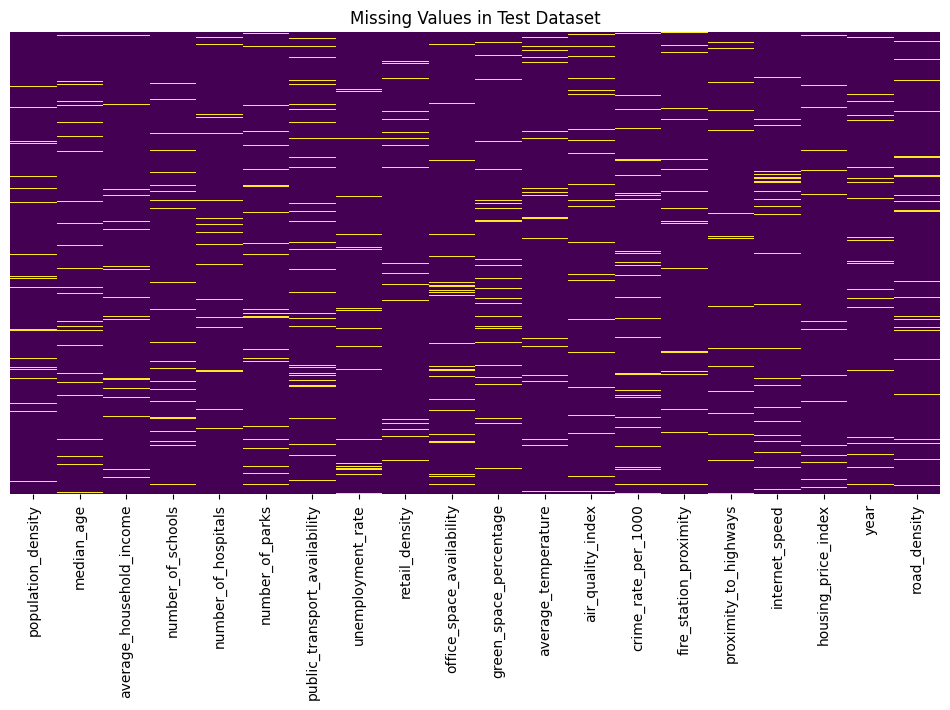

In [29]:
# Check for missing values
print("\n--- Missing Values in Train ---")
print(train.isnull().sum()[train.isnull().sum() > 0])

print("\n--- Missing Values in Test ---")
print(test.isnull().sum()[test.isnull().sum() > 0])

# Visualize missing values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values in Train Dataset')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(test.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values in Test Dataset')
plt.show()

# Analyze Target Variable


--- Target Variable Statistics ---
count    10000.000000
mean         2.988700
std          1.096491
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: development_trend_score, dtype: float64


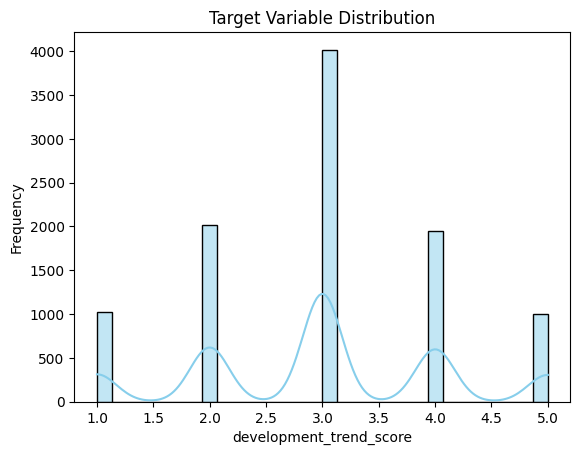

In [30]:
# Inspect the target variable
target = 'development_trend_score'

print("\n--- Target Variable Statistics ---")
print(train[target].describe())

# Plot the distribution of the target variable
sns.histplot(train[target], kde=True, bins=30, color="skyblue")
plt.title('Target Variable Distribution')
plt.xlabel(target)
plt.ylabel('Frequency')
plt.show()

# Correlation Analysis


--- Correlation Heatmap ---


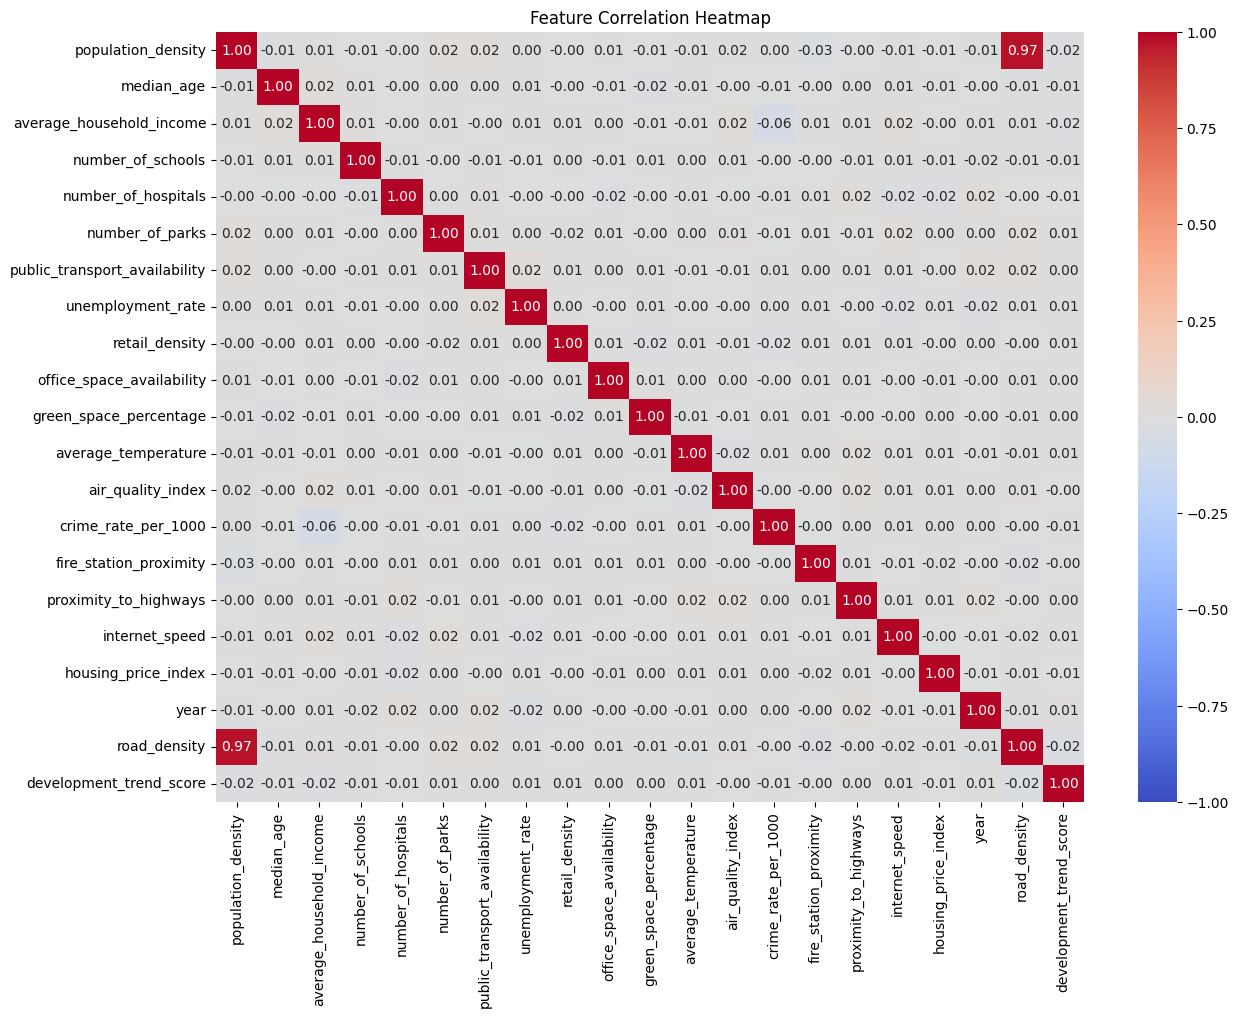

In [32]:
# Correlation heatmap
print("\n--- Correlation Heatmap ---")
plt.figure(figsize=(14, 10))
# Select only numerical features for correlation calculation
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = train[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()

# Numerical Features Analysis


--- Numerical Features Statistics ---
       population_density   median_age  average_household_income  \
count         9500.000000  9500.000000              9.500000e+03   
mean          4991.625970    35.279457              6.010906e+04   
std           1994.854691     9.568304              5.955652e+04   
min            100.000000    18.000000              1.000000e+04   
25%           3640.128794    28.368903              4.129131e+04   
50%           4984.830208    35.116940              5.511348e+04   
75%           6330.058011    41.842575              6.874788e+04   
max          12852.475413    79.790843              1.035413e+06   

       number_of_schools  number_of_hospitals  number_of_parks  \
count        9500.000000          9500.000000      9500.000000   
mean            4.991474             1.982632         3.040842   
std             2.227845             1.394126         1.740090   
min             0.000000             0.000000         0.000000   
25%             3.

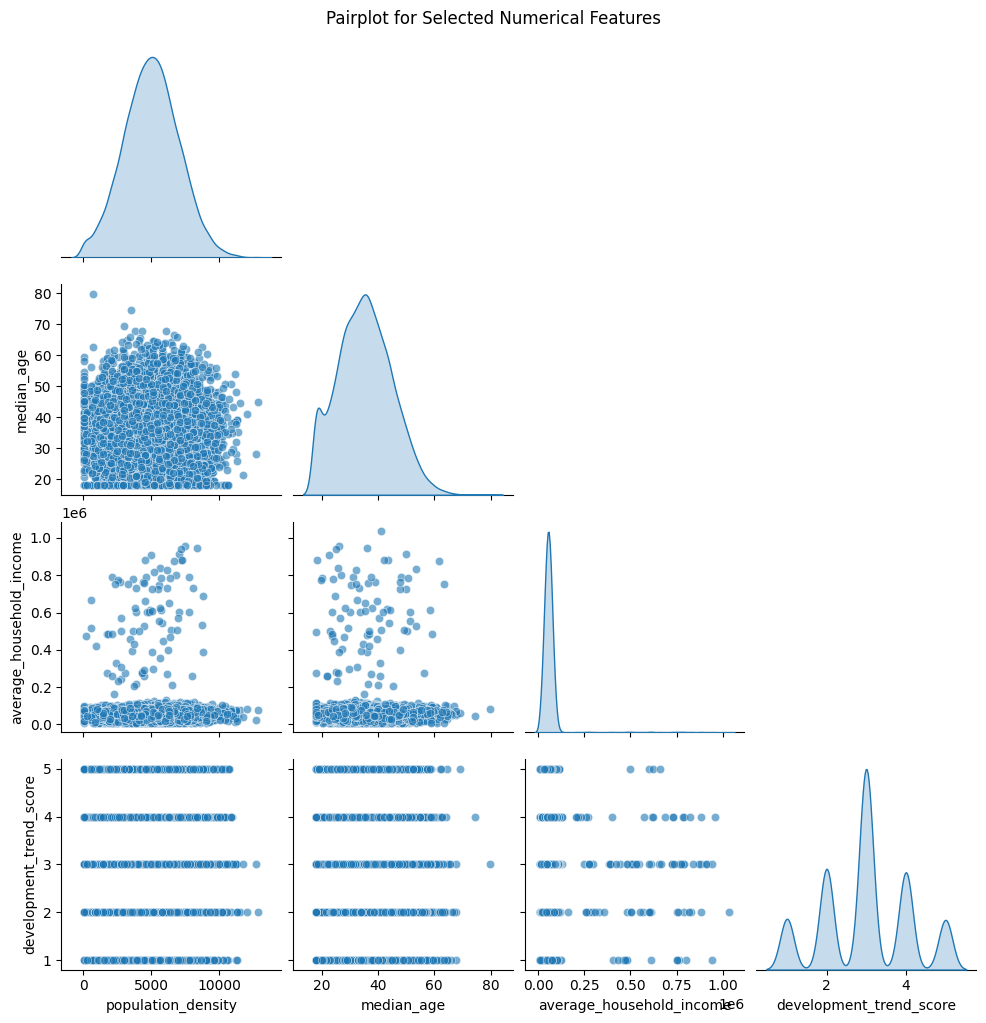

In [33]:
# Analyze numerical features
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns
print("\n--- Numerical Features Statistics ---")
print(train[numerical_features].describe())

# Pairplot for numerical features
selected_features = ['population_density', 'median_age', 'average_household_income', target]
sns.pairplot(train[selected_features], diag_kind='kde', kind='scatter', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot for Selected Numerical Features', y=1.02)
plt.show()

# Categorical Features Analysis


--- Categorical Features ---

Unique values in 'urban_area_type': 4
urban_area_type
Industrial     4979
Mixed          3691
Residential    1294
Commercial       36
Name: count, dtype: int64


<ipython-input-34-562265cfbeb7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, y=col, order=train[col].value_counts().index, palette="viridis")


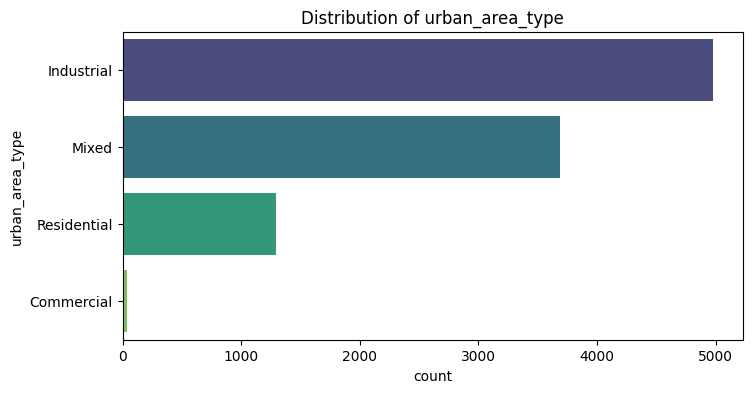

In [34]:
# Analyze categorical features
categorical_features = train.select_dtypes(include=['object']).columns
print("\n--- Categorical Features ---")
for col in categorical_features:
    print(f"\nUnique values in '{col}': {train[col].nunique()}")
    print(train[col].value_counts())

# Visualize categorical distributions
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train, y=col, order=train[col].value_counts().index, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.show()

# Outlier Analysis

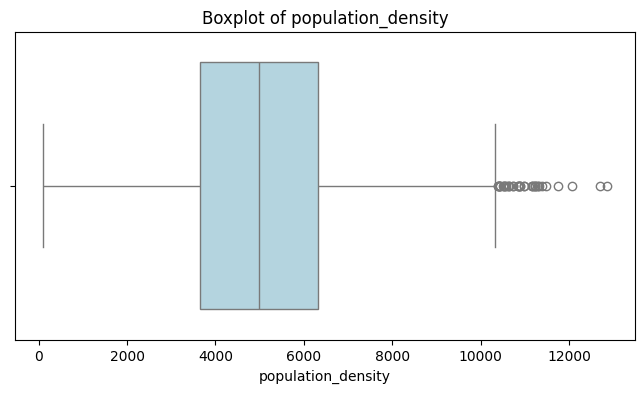

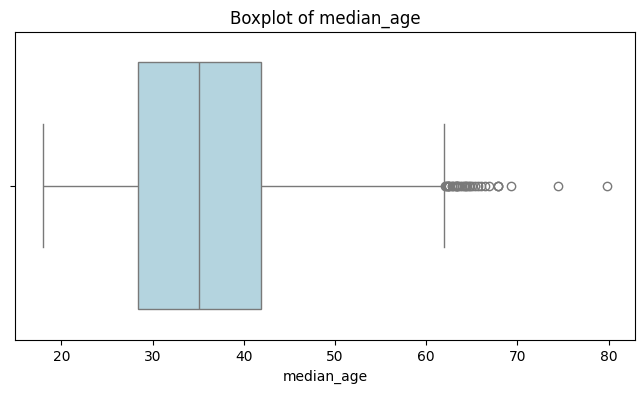

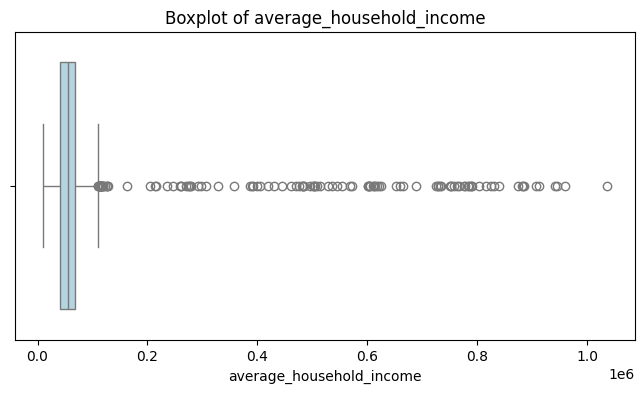

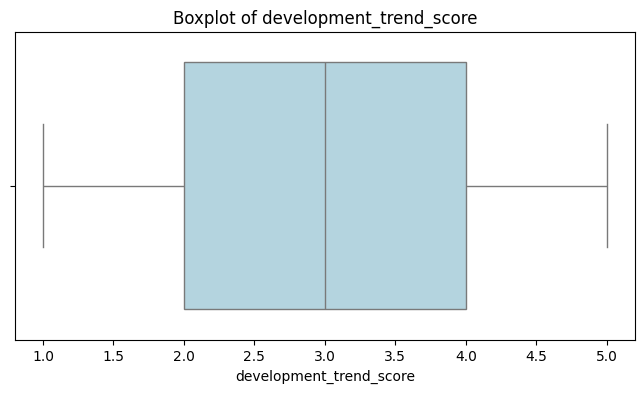

In [35]:
# Boxplots to identify outliers
for col in ['population_density', 'median_age', 'average_household_income', target]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train, x=col, color='lightblue')
    plt.title(f"Boxplot of {col}")
    plt.show()

# **Feature Engineering:**

# Import Libraries and Separate Features

In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.stats import zscore

# Separate numerical and categorical columns
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('development_trend_score')  # Exclude target variable

categorical_features = train.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")

Numerical Features: ['population_density', 'median_age', 'average_household_income', 'number_of_schools', 'number_of_hospitals', 'number_of_parks', 'public_transport_availability', 'unemployment_rate', 'retail_density', 'office_space_availability', 'green_space_percentage', 'average_temperature', 'air_quality_index', 'crime_rate_per_1000', 'fire_station_proximity', 'proximity_to_highways', 'internet_speed', 'housing_price_index', 'year', 'road_density']
Categorical Features: ['urban_area_type']


# Impute Missing Values

In [39]:
# Define imputers for numerical and categorical columns
num_imputer = SimpleImputer(strategy='median')  # Median is robust to outliers
cat_imputer = SimpleImputer(strategy='most_frequent')  # Mode is suitable for categorical data

# Impute missing values
train[numerical_features] = num_imputer.fit_transform(train[numerical_features])
test[numerical_features] = num_imputer.transform(test[numerical_features])

# Get categorical features present in both train and test
categorical_features_test = [col for col in categorical_features if col in test.columns]

# Only impute categorical features that exist in the test data
train[categorical_features] = cat_imputer.fit_transform(train[categorical_features])
# Check if categorical_features_test is not empty before imputing
if categorical_features_test:
    test[categorical_features_test] = cat_imputer.transform(test[categorical_features_test])

# Verify that missing values have been imputed
print("\nMissing values in Train after imputation:")
print(train.isna().sum().sum())

print("\nMissing values in Test after imputation:")
print(test.isna().sum().sum())


Missing values in Train after imputation:
0

Missing values in Test after imputation:
0


# Scale Numerical Features

In [40]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale numerical features
train[numerical_features] = scaler.fit_transform(train[numerical_features])
test[numerical_features] = scaler.transform(test[numerical_features])

# Verify scaling with summary statistics
print("\nTrain Summary Statistics After Scaling:")
print(train[numerical_features].describe())

print("\nTest Summary Statistics After Scaling:")
print(test[numerical_features].describe())


Train Summary Statistics After Scaling:
       population_density    median_age  average_household_income  \
count        1.000000e+04  1.000000e+04              1.000000e+04   
mean        -4.071410e-16  3.840483e-16             -7.389644e-17   
std          1.000050e+00  1.000050e+00              1.000050e+00   
min         -2.515780e+00 -1.852033e+00             -8.588185e-01   
25%         -6.506352e-01 -6.979495e-01             -3.029297e-01   
50%         -3.320561e-03 -1.655556e-02             -8.174563e-02   
75%          6.453278e-01  6.565215e-01              1.406548e-01   
max          4.043318e+00  4.773900e+00              1.680377e+01   

       number_of_schools  number_of_hospitals  number_of_parks  \
count       1.000000e+04         1.000000e+04     1.000000e+04   
mean       -6.679102e-17        -6.963319e-17    -9.343637e-17   
std         1.000050e+00         1.000050e+00     1.000050e+00   
min        -2.299015e+00        -1.459787e+00    -1.791783e+00   
25%    

# Encode Categorical Features

In [43]:
# Initialize OneHotEncoder
# The 'sparse' argument is deprecated, use 'sparse_output' instead
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply One-Hot Encoding
encoded_train = onehot_encoder.fit_transform(train[categorical_features])

# Get categorical features present in both train and test for encoding
categorical_features_test = [col for col in categorical_features if col in test.columns]

# Only transform if categorical_features_test is not empty
if categorical_features_test:
    encoded_test = onehot_encoder.transform(test[categorical_features_test])
else:
    # Handle case where there are no categorical features to encode in the test set
    # Create an empty DataFrame with the expected columns
    encoded_test = pd.DataFrame(columns=onehot_encoder.get_feature_names_out(categorical_features))
    encoded_test = encoded_test.astype(int)  # Ensure data type consistency


# Convert to DataFrame
encoded_train_df = pd.DataFrame(encoded_train, columns=onehot_encoder.get_feature_names_out(categorical_features))
# If encoded_test is empty, create an empty DataFrame with correct columns
if encoded_test.empty:
    encoded_test_df = pd.DataFrame(columns=onehot_encoder.get_feature_names_out(categorical_features), index=test.index).fillna(0)
else:
    encoded_test_df = pd.DataFrame(encoded_test, columns=onehot_encoder.get_feature_names_out(categorical_features_test))


# Concatenate encoded features with original datasets
# Align columns before concatenation
train_cols = encoded_train_df.columns
test_cols = encoded_test_df.columns
missing_cols = train_cols.difference(test_cols)
for col in missing_cols:
    encoded_test_df[col] = 0  # Add missing columns with 0 values
encoded_test_df = encoded_test_df[train_cols]  # Reorder columns to match train

train = pd.concat([train.drop(columns=categorical_features), encoded_train_df], axis=1)
test = pd.concat([test.drop(columns=categorical_features_test, errors='ignore'), encoded_test_df], axis=1)


# Verify the new shape of datasets
print(f"\nTrain Dataset Shape After Encoding: {train.shape}")
print(f"Test Dataset Shape After Encoding: {test.shape}")


Train Dataset Shape After Encoding: (10000, 25)
Test Dataset Shape After Encoding: (5000, 24)


<ipython-input-43-6022af9d69bf>:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_test_df = pd.DataFrame(columns=onehot_encoder.get_feature_names_out(categorical_features), index=test.index).fillna(0)


# Feature Creation

In [51]:
# Refined Feature Engineering Considering Original Features

# 1. Socioeconomic Features
train['income_density_ratio'] = train['average_household_income'] / (train['population_density'] + 1)
test['income_density_ratio'] = test['average_household_income'] / (test['population_density'] + 1)

train['wealth_area_ratio'] = train['average_household_income'] / (train['road_density'] + 1)
test['wealth_area_ratio'] = test['average_household_income'] / (test['road_density'] + 1)

train['employment_population_ratio'] = 1 - train['unemployment_rate']
test['employment_population_ratio'] = 1 - test['unemployment_rate']

# 2. Environmental and Accessibility Features
train['green_space_ratio'] = train['green_space_percentage'] / 100
test['green_space_ratio'] = test['green_space_percentage'] / 100

train['public_service_access'] = (
    (train['number_of_schools'] + train['number_of_hospitals'] + train['number_of_parks']) /
    (train['population_density'] + 1)
)
test['public_service_access'] = (
    (test['number_of_schools'] + test['number_of_hospitals'] + test['number_of_parks']) /
    (test['population_density'] + 1)
)

train['park_density'] = train['number_of_parks'] / (train['road_density'] + 1)
test['park_density'] = test['number_of_parks'] / (test['road_density'] + 1)

train['school_hospital_ratio'] = train['number_of_schools'] / (train['number_of_hospitals'] + 1)
test['school_hospital_ratio'] = test['number_of_schools'] / (test['number_of_hospitals'] + 1)

# 3. Interaction Features
train['pop_density_unemployment_interaction'] = train['population_density'] * train['unemployment_rate']
test['pop_density_unemployment_interaction'] = test['population_density'] * test['unemployment_rate']

train['green_space_income_interaction'] = train['green_space_percentage'] * train['average_household_income']
test['green_space_income_interaction'] = test['green_space_percentage'] * test['average_household_income']

train['education_health_interaction'] = train['number_of_schools'] * train['number_of_hospitals']
test['education_health_interaction'] = test['number_of_schools'] * test['number_of_hospitals']

# 4. Temporal and Rank Features
train['income_rank'] = train['average_household_income'].rank()
test['income_rank'] = test['average_household_income'].rank()

train['population_density_rank'] = train['population_density'].rank()
test['population_density_rank'] = test['population_density'].rank()

"""train['population_growth_rate'] = (
    (train['current_population'] - train['last_year_population']) /
    (train['last_year_population'] + 1)
)
test['population_growth_rate'] = (
    (test['current_population'] - test['last_year_population']) /
    (test['last_year_population'] + 1)
)"""

# 5. Additional Relevant Features
train['facility_density'] = (
    (train['number_of_schools'] + train['number_of_hospitals'] + train['number_of_parks']) /
    (train['road_density'] + 1)
)
test['facility_density'] = (
    (test['number_of_schools'] + test['number_of_hospitals'] + test['number_of_parks']) /
    (test['road_density'] + 1)
)

# Verification of New Features
print("\nRefined Features in Train Set:")
print(train.describe())

print("\nRefined Features in Test Set:")
print(test.describe())


Refined Features in Train Set:
       population_density    median_age  average_household_income  \
count        1.000000e+04  1.000000e+04              1.000000e+04   
mean        -4.071410e-16  3.840483e-16             -7.389644e-17   
std          1.000050e+00  1.000050e+00              1.000050e+00   
min         -2.515780e+00 -1.852033e+00             -8.588185e-01   
25%         -6.506352e-01 -6.979495e-01             -3.029297e-01   
50%         -3.320561e-03 -1.655556e-02             -8.174563e-02   
75%          6.453278e-01  6.565215e-01              1.406548e-01   
max          4.043318e+00  4.773900e+00              1.680377e+01   

       number_of_schools  number_of_hospitals  number_of_parks  \
count       1.000000e+04         1.000000e+04     1.000000e+04   
mean       -6.679102e-17        -6.963319e-17    -9.343637e-17   
std         1.000050e+00         1.000050e+00     1.000050e+00   
min        -2.299015e+00        -1.459787e+00    -1.791783e+00   
25%        -4.56

# Outlier Detection and Handling

In [52]:
# Detect outliers using Z-score
z_scores = zscore(train[numerical_features])

# Flag outliers (Z-score > 3 or < -3)
outliers = (abs(z_scores) > 3).sum(axis=0)

# Display the number of outliers per feature
print("\nOutliers Detected in Train Dataset (Z-score > 3):")
print(dict(zip(numerical_features, outliers)))

# Optionally remove outliers
train_cleaned = train[(abs(z_scores) <= 3).all(axis=1)]

# Verify the shape of cleaned data
print("\nTrain Dataset Shape After Removing Outliers:")
print(train_cleaned.shape)


Outliers Detected in Train Dataset (Z-score > 3):
{'population_density': 23, 'median_age': 23, 'average_household_income': 91, 'number_of_schools': 46, 'number_of_hospitals': 49, 'number_of_parks': 35, 'public_transport_availability': 0, 'unemployment_rate': 19, 'retail_density': 23, 'office_space_availability': 0, 'green_space_percentage': 0, 'average_temperature': 33, 'air_quality_index': 22, 'crime_rate_per_1000': 18, 'fire_station_proximity': 0, 'proximity_to_highways': 0, 'internet_speed': 24, 'housing_price_index': 17, 'year': 0, 'road_density': 20}

Train Dataset Shape After Removing Outliers:
(9578, 40)


# **Selecting and implementing the best-performing models and algorithms.**

In [54]:
# import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
!pip install catboost
from catboost import CatBoostRegressor
import numpy as np
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


# Data Preprocessing

In [60]:
# Import preprocessing libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Get all columns except target and those already specified
# Exclude 'development_trend_score' and the new columns created by OneHotEncoder
# Instead of directly using categorical_columns, get the remaining columns dynamically

# Define categorical_columns based on data type
categorical_columns = train.select_dtypes(include=['object', 'category']).columns.tolist()


numerical_columns = [col for col in train.columns
                     if col not in categorical_columns + ['development_trend_score']
                     and col not in train.columns[train.columns.str.startswith('urban_area_type_')]]


# Get columns present in both train and test
common_numerical_columns = list(set(train.columns) & set(test.columns) - {'development_trend_score'})

# Apply encoding using only common columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', common_numerical_columns),
        # ... (your other transformers if any) ...
    ]
)

# Transform the datasets
X_train_encoded = preprocessor.fit_transform(train.drop(columns=['development_trend_score']))
X_test_encoded = preprocessor.transform(test.drop(columns=['development_trend_score'], errors='ignore')) # ignore if column not found


# Get feature names after transformation
feature_names = preprocessor.get_feature_names_out()

# Combine features back into DataFrames
X_train_encoded = pd.DataFrame(X_train_encoded, columns=feature_names)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=feature_names)

# Add target variable back for convenience
train_encoded = pd.concat([X_train_encoded, train['development_trend_score'].reset_index(drop=True)], axis=1)
test_encoded = pd.concat([X_test_encoded, pd.Series(np.zeros(len(test)), name='development_trend_score')], axis=1)  # Fill with 0s if 'development_trend_score' is not in test

# Data Splitting

In [61]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Separate features and target variable
X_train = train_encoded.drop(columns=['development_trend_score'])
y_train = train_encoded['development_trend_score']
X_test = test_encoded.drop(columns=['development_trend_score'])
y_test = test_encoded['development_trend_score']

# Split the training set into train and validation sets (80-20 split)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Verify the split
print(f"Train Set Size: {X_train_split.shape}")
print(f"Validation Set Size: {X_val_split.shape}")

Train Set Size: (8000, 38)
Validation Set Size: (2000, 38)


# Model Initialization

In [62]:
# Import models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

# Define models with initial hyperparameters
models = {
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=200, random_state=42, objective='reg:squarederror'),
    "LightGBM": lgb.LGBMRegressor(n_estimators=200, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=200, learning_rate=0.05, depth=6, random_state=42, silent=True),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5),
    "SVR (RBF Kernel)": SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

# Model Training and Validation

In [63]:
# Import evaluation metric
from sklearn.metrics import mean_squared_error
import numpy as np

# Function to calculate RMSE
def evaluate_model(predictions, true_values):
    return np.sqrt(mean_squared_error(true_values, predictions))

# Train and validate each model
results = []
for name, model in models.items():
    # Train the model
    model.fit(X_train_split, y_train_split)
    # Predict on validation set
    val_pred = model.predict(X_val_split)
    # Calculate RMSE
    rmse = evaluate_model(val_pred, y_val_split)
    results.append((name, rmse))
    print(f"{name} RMSE: {rmse}")

# Create a DataFrame for model comparison
model_comparison = pd.DataFrame(results, columns=['Model', 'RMSE']).sort_values(by='RMSE')

# Display comparison
print("\nModel Comparison (Sorted by RMSE):")
print(model_comparison)

Random Forest RMSE: 1.1012814524452865
XGBoost RMSE: 1.192744869466608
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7381
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 38
[LightGBM] [Info] Start training from score 2.976250
LightGBM RMSE: 1.11632607791389
CatBoost RMSE: 1.0969289247945817
Gradient Boosting RMSE: 1.0990195744138511
Ridge RMSE: 1.0967613122762434
Lasso RMSE: 1.0938932924726226
ElasticNet RMSE: 1.0947800986385217
SVR (RBF Kernel) RMSE: 1.0923477500997343

Model Comparison (Sorted by RMSE):
               Model      RMSE
8   SVR (RBF Kernel)  1.092348
6              Lasso  1.093893
7         ElasticNet  1.094780
5              Ridge  1.096761
3           CatBoost  1.096929
4  Gradient Boosting  1.099020
0      Random Forest  1.101281
2           LightGBM  1.116326
1            XGBoost  1.

# Retraining the Best Model

In [64]:
# Identify the best model
best_model_name = model_comparison.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")

# Retrain the best model on the full training set
best_model.fit(X_train, y_train)


Best Model: SVR (RBF Kernel)


SVR()

In [65]:
# Predict on the test set
test_pred = best_model.predict(X_test)

# Calculate RMSE on the test set
test_rmse = evaluate_model(test_pred, y_test)
print(f"\nTest RMSE for Best Model ({best_model_name}): {test_rmse}")


Test RMSE for Best Model (SVR (RBF Kernel)): 2.9615811069051494


# Feature Importance (for Tree-Based Models)

In [66]:
# Check if the best model has feature importances
if hasattr(best_model, 'feature_importances_'):
    # Extract feature importance
    feature_importances = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': best_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    # Display top features
    print("\nFeature Importances:")
    print(feature_importances)

    # Plot feature importances
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importances['Feature'], feature_importances['Importance'])
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importance for {best_model_name}")
    plt.xlabel("Importance")
    plt.show()

# **Hyperparameter Tuning abd Optimization**

# Cross-Validation

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
import numpy as np

# Initialize SVR with RBF kernel
svr_model = SVR(kernel='rbf')

# Perform cross-validation
cv_scores = cross_val_score(svr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate and display the average RMSE score
mean_cv_rmse = np.sqrt(-cv_scores.mean())
print(f"Average CV RMSE: {mean_cv_rmse}")


Average CV RMSE: 1.0971740838577673


# Hyperparameter Tuning with Grid Search

In [70]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for SVR
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV with SVR
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train_split, y_train_split)

# Display best parameters and performance
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV RMSE: {np.sqrt(-grid_search.best_score_)}")


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'C': 10, 'epsilon': 0.01, 'gamma': 'scale'}
Best CV RMSE: 1.097740582876709


# Ensemble Method (Stacking)

In [71]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# Define base learners
base_learners = [
    ('svr', SVR(kernel='rbf')),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
]

# Define the meta-learner
meta_learner = Ridge()

# Initialize StackingRegressor
stacking_model = StackingRegressor(estimators=base_learners, final_estimator=meta_learner)

# Fit the stacking model
stacking_model.fit(X_train_split, y_train_split)

# Predict on validation set
stacking_pred = stacking_model.predict(X_val_split)

# Evaluate performance using RMSE
stacking_rmse = evaluate_model(stacking_pred, y_val_split)
print(f"Stacking Model RMSE: {stacking_rmse}")

Stacking Model RMSE: 1.0910647472219688


# **Test Set Predictions and Submission**

In [80]:
# Use the best model from GridSearchCV (already tuned model)
best_model = grid_search.best_estimator_

# Predict on the test set
test_predictions = best_model.predict(X_test)  # Ensure X_test is prepared correctly

# Create a DataFrame for submission
# If 'ID' is not in 'test', create it using the index
# Assuming 'test' has a default RangeIndex
submission = pd.DataFrame({
    'ID': test.index,  # Use index as ID if 'ID' column is not present
    'development_trend_score': test_predictions
})

# Save the submission file
submission.to_csv('test_predictions.csv', index=False)
print("Submission file saved.")

Submission file saved.
